# The Project: SAT - standardizing test: What's the indicator effect and vice-versa?

In this demo project, we will dig into the topic of _US education system_, and the sector is that __is there any efficacy of standardizing the test?__ Because this test score will be a pass-assist of high school students when one's wants to apply for College, does the standardizing have unfair to some certain group?? To investigate this sector, we will focus on the relation of __SAT scores__ and demographic information. We could correlate SAT scores with factors like __race, gender, income,__ and more.

The __SAT__, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's important to perform well. 

The test consists of _three sections_, each of which has _800 possible points_. The combined score is out of 2,400 possible points (while this number has changed a few times, the dataset for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

The data of [high school SAT score](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) and [NYC demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) is avaiable on NYC data website.

There is some picture of these data, and one thing we can observe that if we just work with these 2 dataset, we can't take full of infromation that we want for our analysis, so we have to gather information from somewhere else and combine it

![Image](https://s3.amazonaws.com/dq-content/sat.png)

Below is some website about dataset that covering SAT score and demographics information, but we have to take from each website, and gather it - due to the dataset is iterrelated - on the one dataset before we can start.

- [SAT score by the school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4): SAT scores for each high school in New York City
- [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt): Attendance information for each school in New York City
- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3):Information on class size for each school
- [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e):Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [Graduations outcome](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a):the percentage of students who graduated, and other outcome information
- [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j):Demographic information for each school
- [School Survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8): Surveys of parents, teachers, and students at each school

## MISSION A: LOADING RAW DATA - PRE-PROCESSING PART 1

# Sub-mission 1: Find the background of information

Before we move into coding, we'll need to do some __background research__. A thorough understanding of the data helps us _avoid costly mistakes_, such as thinking that _a column represents something other than what it does_. Background research gives us a better understanding of __how to combine and analyze the data__. We'll reseacrch about these source:
- [New York City](https://en.wikipedia.org/wiki/New_York_City)
- [SAT](https://en.wikipedia.org/wiki/SAT)
- [School in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [The data using for this demo project](https://data.cityofnewyork.us/browse?category=Education)

By the reseach, we've observed some information:
- SAT test is critical step for high school __juniors, seniors__ student => We can remove all of range below high school student (below __grade 9__)
- New York City have 5 distinct borough, which contains a dozen of schools, and not all these are high school => We need some data cleaning to only take the high school
- Each borough have its own DBN (distric borough number) => we can combine by this value
- Aggregating data by district allows us to use the district mapping data to plot district-by-district differences.

# Sub-mission 2: Read data in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Since we have serveral files, we will read the file name from the list, and then store it in a dictionary for the after convenient.

In [2]:
## Create function to open file:
def open_file(file_name):
    file = pd.read_csv('schools/{}'.format(file_name))
    return file

## Create a list of colum name:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduations.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}
for i in data_files:
    key = i.replace('.csv','') ## extract the name of file
    d = open_file(i)
    data[key] = d

In [3]:
## Check:
for key, value in data.items():
    print(key)

ap_2010
class_size
demographics
graduations
hs_directory
sat_results


# Sub-mission 3: Explore SAT data:

Since the main interest of us is SAT score data, now let's take a look for a few records in key 'sat_results' on data dictionaries.

In [4]:
## Extract some records of SAT data:
print(data['sat_results'].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [5]:
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


We have some inform about this data:
- This data have not any missing value
- At each DBN records correspond with each distinct High school name => __DBN is unique value__.
- Except DBN, highschool name and SAT data, there's nothing else
- Because we don't want to track the SAT result by all 3 sections's result for each analysis period in this project => we will _sum up_ the SAT result (3 section) into 1 columns for the convenient.

For another data we got, we will loop through out its key in data store and see the first five row for each data.

In [6]:
for key in data:
    if key != 'sat_results':
        print(data[key].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

We can observe that:
- There a lot of thing we don't use for the analysis, especcially the dataframe about class_size after AP test result data, which we need to clear some filed not right with our analysis.
- For the value DBN, somewhere it's duplicate (5 records for one school) => we need some cleaning process to avoid duplicate merge.
- Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.

## Sub-mission 4: Read survey data in

In the previous, we have not yet import survey file in because its format is txt and the encoding isn't in UFT-8 yet, now we will loading it into 2 file and merge it into 1 data frame. The file contains: survey of district 75 and the common survey.

In [7]:
## Read survey_all in:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter = '\t', encoding='windows-1252')

# Read survey_d75 in:
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter = '\t', encoding='windows-1252')

## Combine data:
survey = pd.concat([all_survey,d75_survey], axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Columns: 1942 entries, dbn to s_N_q14g_4
dtypes: float64(1931), int64(6), object(5)
memory usage: 24.4+ MB


We observed that:
- Since the data has over 2000 columns => we will need to clean all the columns that don't relate to our analysis
- The dataset has DBN => we can merge the first dataset in here.
------
After cross-check with the describe for dataset, we can see that except the DBN field and those field are "rr_s" to "aca_tot_10", almost the rest we don't need => we will drop all these to make the data more clear and easier to process with. The reason to keep is: These columns give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It also gives us the DBN, which allows us to uniquely identify the school. 

To process this:
- We copy the value in dbn column into new column named DBN
- We convert all the columns name we need into upper case
- We use column position to clear the data

In [9]:
## Copy and create new column of dbn value:
survey.loc[:,'DBN'] = survey['dbn']

## Create a lst of field for analysis:
list_name = ['DBN',"rr_s", "rr_t", "rr_p", 
             "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", 
             "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", 
             "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", 
             "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

survey = survey.loc[:,list_name]
print(survey.shape)

# Upload into data store:
data['survey'] = survey

(1702, 23)


C:\Users\bieng\AppData\Local\Temp/ipykernel_6200/1310943864.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  survey.loc[:,'DBN'] = survey['dbn']


## Sub-mission 5: Handle the missing DBN columns

Back to the dataset in data store, we can see that data of `directory school` and `class_size` invisible for DBN field, in `class_size`, it is completely gone out.
Looking in detaily, if we take the school code plus to the CSD in class_size field, we got the DBN in sat_results data, like below:
- __sat_results__: _DBN (01M292)_...
- __class_size__: CSD (_1_...) + School code (_M015_, ...) ~ _DBN(1M015 : Roberto Clemate school)_
----
With that mean, we need to add a leading before each syntax of CSD field, like example below:
- Old CSD: 1 => New CSD :01
- Old CSD: 19 => New CSD : 19

And then combine the new CSD with the School Code => We have DBN columns for class_size data.

In [10]:
# Check data type of CSD:
data['class_size']['CSD'].dtype

dtype('int64')

In [11]:
# Check data type of SCHOOL CODE
data['class_size']['SCHOOL CODE'].dtype

dtype('O')

In [12]:
## Fill CSD function:
def fill_z(number):
    if len(str(number))> 1:
        return str(number)
    if len(str(number)) == 1:
        new = str(number).zfill(2)
        return new
    
# Apply for CSD series:
data['class_size'].loc[:,'pad_CSD'] = data['class_size']['CSD'].apply(fill_z)
data['class_size']['pad_CSD'].unique()


array(['01', '04', '02', '21', '27', '05', '06', '14', '17', '20', '03',
       '32', '07', '08', '09', '10', '11', '12', '13', '15', '16', '19',
       '18', '22', '23', '24', '25', '26', '28', '29', '30', '31'],
      dtype=object)

In [13]:
## Create a new DBN column:
data['class_size'].loc[:,'DBN'] = data['class_size']['pad_CSD'] + data['class_size']['SCHOOL CODE']

## Check:
data['class_size']['DBN'].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

# Sub-mission 6: Explore SAT data (p2)

As said, in SAT dataset we have three distinct section result of SAT test, and we'd like to combine it for the convenient with analysis progress. The job for us now is:
- Check the data format of three field that mentioned (`SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`), change it to numeric if not.
- Store the result of combined three section into new column.

In [14]:
column_check = ['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']

# Check the format:
data['sat_results'][column_check].dtypes

SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In [15]:
## Convert data type:
for i in column_check:
    data['sat_results'][i] = pd.to_numeric(data['sat_results'][i], errors='coerce')

## Combine data:
data['sat_results'].loc[:,'sat_scores'] = data['sat_results'].iloc[:,3:].sum(axis=1)
data['sat_results']['sat_scores'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_scores, dtype: float64

In a sub-mission 6, we've combined the SAT result into one column and stored it in `sat_scores`. Now looking for other dataset and check whether it OK, and I saw the `Location 1` in `hs_directory` file is wrtitten in a complex way. Now it's time to __extract the longtitude and latitude coordinate__ - This enables us to map the schools and uncover any geographic patterns in the data.

To get the clearly picture for the location is mentioned above, let's see a few of data for location:

In [16]:
## Preview of location data:
data['hs_directory']['Location 1'].head(n=3)

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
Name: Location 1, dtype: object

In [17]:
## Extract the first location:
data['hs_directory']['Location 1'].iloc[0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

There is a same pattern we got here: `XX address \n address XX \n (long_position, lat_position)` with the part we want to pull out is data in parenthese `(long_pos, lat_pos)`. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

We will use regex to parsing only the part we want, in the code-block below:

In [18]:
## Import the regex library
import re

## Define function to extract the lat_coordinate:
def coordinate(str_):
    modify = re.findall(r'\(.+\)', str_)
    lat = (modify[0].split(','))[0].replace('(','')
    return lat

## Filter:
data['hs_directory'].loc[:,'lat'] = data['hs_directory']['Location 1'].apply(coordinate)
data['hs_directory']['lat'].head()

0     40.67029890700047
1      40.8276026690005
2    40.842414068000494
3     40.71067947100045
4    40.718810094000446
Name: lat, dtype: object

In [19]:
## Define function for long coordinate:
def coordinate_long(str_):
    modify = re.findall(r'\(.+\)', str_)
    long = (modify[0].split(','))[1].replace(')','')
    return long

# Filter:
data['hs_directory'].loc[:,'long'] = data['hs_directory']['Location 1'].apply(coordinate_long)

# Convert the data type:
order = ['lat', 'long']

for name in order:
    data['hs_directory'][name] = pd.to_numeric(data['hs_directory'][name], errors='coerce')
    
## Check the longtitute data:
print(data['hs_directory']['long'].head(n=3))

## Check the data type:
data['hs_directory'][order].dtypes

0   -73.961648
1   -73.904475
2   -73.916162
Name: long, dtype: float64


lat     float64
long    float64
dtype: object

__Conclusion__ : Over 6 sub-mission, we've got the pre-processing data with maintaining of the multi-duplicate DBN records at other dataset while the sat_results dataset this field is unique. For the example:
- `sat_results`: `01M292` -> `01M448` ->...
- other dataset: `01M292` x n-times -> `01M448` x n-times... (ex: `class_size` dataset)
----
This situation creates problems, because we don't know which of the multiple entries in the `class_size` dataset we should combine with the single matching entry in `sat_results` => To resolve this issue, we'll condense the `class_size`, `graduation` and `demographics` datasets so that __each DBN__ is __unique__.

## MISSION B: PRE-PROCESSING DATA PART 2

## Sub-mission 1: Clean/ condense the Class_size data:

Let's take a look a few records of class_size data:

In [20]:
data['class_size'].head(n=3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,pad_CSD,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015


DBN number is duplicate 5~6 times due to the difference of `PROGRAM TYPE`, `GRADE` and the other field, but let's checking closer to `PROGRAM TYPE` and `GRADE` field:

In [21]:
## Identify the value of PROGRAM TYPE field:
print('Dataset of Program type: {}'.format(data['class_size']['PROGRAM TYPE'].unique()))

## Identify the value of GRADE field:
print('Dataset of Grade: {}'.format(data['class_size'].iloc[:,4].unique())) #GRADE is postion 5th columns

Dataset of Program type: ['GEN ED' 'CTT' 'SPEC ED' nan 'G&T']
Dataset of Grade: ['0K' '01' '02' '03' '04' '05' '0K-09' nan '06' '07' '08' 'MS Core'
 '09-12' '09']


Because we just interest with those in High school level (they're SAT's attendance) => We've drop out all things below GRADE `'09'&'MS Core'` and keep only `'GEN ED'` program type. 

In [22]:
# Store the trial data:
class_size = data['class_size'].copy()

## Filter the GRADE & PROGRAM TYPE data:
bool_1 = class_size.iloc[:,4] == '09-12'
bool_2 = class_size['PROGRAM TYPE'] == 'GEN ED'
add = bool_1&bool_2

class_size = class_size[add]
# Check:
print(class_size.shape)
class_size.head()

(6513, 18)


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,pad_CSD,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


As the pointed out result, the DBN still not unique, and one school still repeat 5 times or more. In the same time, we can see the value change in `CORE SUBJECT`, `CORE COURSE` (Ex: English 9, 10... and MATH with various course). But we don't want the final data just only a subset course of any subset subject in any schools, instead, we want our class size data to include every single class a school offers  => That's will make the data maintain the maximum information as the best as we could.

To do this, we can groupby the `DBN` field, and apply arrgregate average value on each group.

In [23]:
## Group dataset along DBN field, and computing:
class_size = (class_size.groupby('DBN')).agg(np.mean)

## Assign back the DBN column: (because the groupby operate make DBN become index)
class_size.reset_index(inplace=True)
class_size.head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1.0,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1.0,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1.0,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1.0,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1.0,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [24]:
## Assign back to the class size data in data store:
data['class_size'] = class_size

We've done the class_size dataset, let's move to demographics data and see anything we could do.

In [25]:
# Check the demographics data:
data['demographics'].head(n=3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


We got the same scence as the previous version of class_size data: The duplicate. One item (school) duplicated by the _schoolyear_ field, which describe the period for caculating of studen't graduation, and back to the dataset of SAT scores we got - remind that we just analysis on _the period of 2011~2012_ => This is a condition to filter the data.

## Sub-mission 2; Clean/ condense the Demographics data:

In [26]:
## Check the schoolyear field:
data['demographics']['schoolyear'].dtypes

dtype('int64')

In [27]:
# Convert data type:
def to_str(number):
    str_1 = str(number)[:4]
    str_2 = str(number)[4:]
    return str_1 + '-' + str_2

data['demographics'].loc[:,'schoolyear'] = data['demographics']['schoolyear'].apply(to_str)

## Filter:
bool_1 = data['demographics']['schoolyear'] == '2011-2012'

data['demographics'] = data['demographics'][bool_1]
data['demographics'].head(n=3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,2011-2012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,2011-2012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,2011-2012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


Make a quick glance test for first 3 records, there's no duplicate of DBN items => Everything went OK.

## Sub-mission 3: Clean the graduations data:

The next process is check the graduations data and clean it if any duplicate appear, now let's take a few records:

In [28]:
## Check the graduations data:
data['graduations'].head(n=3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1


Because we just give our interest in period of 2011-2012 => let's check the Cohort field if there is any value out of range we want. In additional, we just want the value `Total Cohort` in Demographic field (the Demographic appears to refer to a specific demographic group, `Cohort` refer to the year the data represents) so let's check out and see what's to delete.

In [29]:
## Check the range period in Cohort:
data['graduations']['Cohort'].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

In [30]:
## Create mask condition:
bool_1 = data['graduations']['Cohort'] == '2006'
bool_2 = data['graduations']['Demographic'] == 'Total Cohort'

combine = bool_1&bool_2

## Filter:
data['graduations'] = data['graduations'][combine]
data['graduations'].head(n=3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6


We've got almost the data without any DBN duplicate, now back to the Advanced Placement (AP). High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit. The thing we need to perform is convert the format of string AP test score to the numeric.

## Sub-mission 4: Convert the AP test core value

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are rarer in schools that lack funding or academic rigor. It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools

-----
There are three columns we'll need to convert:

- __AP Test Takers__ (note that there's a trailing space in the column name)
- __Total Exams Taken__
- __Number of Exams with scores 3 4 or 5__


In [31]:
## Check column name:
data['ap_2010'].columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [32]:
## Format column name:
data['ap_2010'].columns = data['ap_2010'].columns.str.strip()

## Convert value format
col = ['AP Test Takers', 'Total Exams Taken','Number of Exams with scores 3 4 or 5']

for name in col:
    data['ap_2010'][name] = pd.to_numeric(data['ap_2010'][name], errors='coerce')
    
# Check:
data['ap_2010'][col].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Now we've almost done, so it's time to considering how to combine each dataset in data store. We have DBN field is unique, but we also observed that not all the DBN value in SAT result dataset will be match all in the other dataset (in other word, the other dataset will contain more DBN value than SAT result data) => That's the reason we need to care about what kind of merge we need to perform?? 

--------
And it's a good time to look back at our goal: _Find the correlation between SAT score vs demographics data_ => Since our SAT data isn't large as other data => We don't want any drop information of SAT score data happend, so which kind of combine should we have to operate?

## Sub-mission 5: Combine the data

We will use merge function of Py to operate, and use the method `left` on those field which DBN isn't enough to avoid loss data, in the countracy, `inner` will bring us the properly data. Let's start first with `sat_results` dataset.

In [33]:
# Combine first pair dataset:

combine = data['sat_results'] ## define the left data
combine = combine.merge(data['ap_2010'],how='left',on='DBN')

# Combine the next dataset:
combine = combine.merge(data['graduations'], how='left', on='DBN')

# Check:
print(combine.shape)
combine.head(n=3)

(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_scores,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6


Now that we've performed the left joins, we still have to merge `class_size, demographics, survey,` and `hs_directory` into combined. Since these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

In [34]:
# Setting for display more columns:
pd.set_option('display.max_columns',60)

In [35]:
## Priority to merge: class_size -> demographics -> survey -> hs_directory

combine = combine.merge(data['class_size'],how='inner', on='DBN', suffixes=('_x1', '_y1'))
combine = combine.merge(data['demographics'], on='DBN', how='inner', suffixes=('_x2','_y2'))
combine = combine.merge(data['survey'], on='DBN', how='inner', suffixes=('_x3','_y3'))
print(combine.shape)
combine.head(n=3)

(435, 99)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_scores,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,...,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,...,227,53.8,7,1.7,259.0,61.4,163.0,38.6,89.0,70,39,379.0,26.0,151.0,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,...,181,45.9,9,2.3,226.0,57.4,168.0,42.6,84.0,95,10,385.0,37.0,46.0,7.9,7.4,7.2,7.3,6.6,5.8,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,...,331,55.4,62,10.4,327.0,54.7,271.0,45.3,0.0,98,28,NaN,42.0,150.0,8.7,8.2,8.1,8.4,7.3,8.0,8.0,8.8,NaN,NaN,NaN,NaN,7.9,7.9,7.9,8.4


In [36]:
# Processing combine with hs_directory:
data['hs_directory'].columns = data['hs_directory'].columns.str.strip()

# Create a new columns:
data['hs_directory'].loc[:,'DBN'] = data['hs_directory']['dbn']

combine = combine.merge(data['hs_directory'], on='DBN', how='inner', suffixes=('_x4','_y4'))

In [37]:
print(combine.shape)

(363, 159)


Now, we will fill in the missing value by mean value (if any columns is ratio scale like `avg_class_size`...) and the remain with 0.

In [38]:
# Fill with mean value:
mean = combine.copy().mean(numeric_only=True)
combine.fillna(mean, inplace=True)

# Fill any remain with 0:
combine.fillna(0, inplace=True)

# Check:
combine.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
priority09                         0
priority10                         0
Location 1                         0
lat                                0
long                               0
Length: 159, dtype: int64

In [39]:
# Extract the school district:
def extract_dis(str_):
    return str_[0:2]

combine.loc[:,'school_dis'] = combine.DBN.apply(extract_dis)
# Check:
combine.school_dis.head(n=3)

0    01
1    01
2    01
Name: school_dis, dtype: object

The data now is ready to analysis and plot, now let's move to the analysis process.

## MISSION C: ANALYSIS - VISUALIZATION

## Sub-mission 1: How each field relative with SAT scores?

As mentioned, we'd like to relevant the relation of SAT result with demographics infor, so now in order to get the overview about what we will perform in next step, let's release the relation of these field.

We will use the correlation method with `r` value technical to find the relation of these field. An r value falls between -1 and 1. The value determines whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation. 

Because our main theme is focus in the fairness of standardlize test like SAT, any field stick along with SAT like `gender, race`, ... and the correlation of it is the object we're aimming for.  If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women and vice-versa.

In [40]:
# Setting the display row:
pd.set_option('display.max_rows',80)


In [41]:
# Find the correlation:

correlation = combine.corr(method='pearson')['sat_scores'] ## Set the obj is sat scores
correlation

SAT Critical Reading Avg. Score         0.472399
SAT Math Avg. Score                     0.465612
SAT Writing Avg. Score                  0.472854
sat_scores                              1.000000
AP Test Takers                          0.254925
Total Exams Taken                       0.250432
Number of Exams with scores 3 4 or 5    0.221759
Total Grads - % of cohort               0.281050
Total Regents - % of cohort             0.326649
Total Regents - % of grads              0.248047
Advanced Regents - % of cohort          0.375716
Advanced Regents - % of grads           0.361502
Regents w/o Advanced - % of cohort     -0.065460
Regents w/o Advanced - % of grads      -0.218084
Local - % of cohort                    -0.237538
Local - % of grads                     -0.248047
Still Enrolled - % of cohort           -0.239851
Dropped Out - % of cohort              -0.211171
CSD                                     0.080944
NUMBER OF STUDENTS / SEATS FILLED       0.305352
NUMBER OF SECTIONS  

Let's make a barplot for this correlation result, we will contain the item of survey we added with the section test of SAT test to track easier.

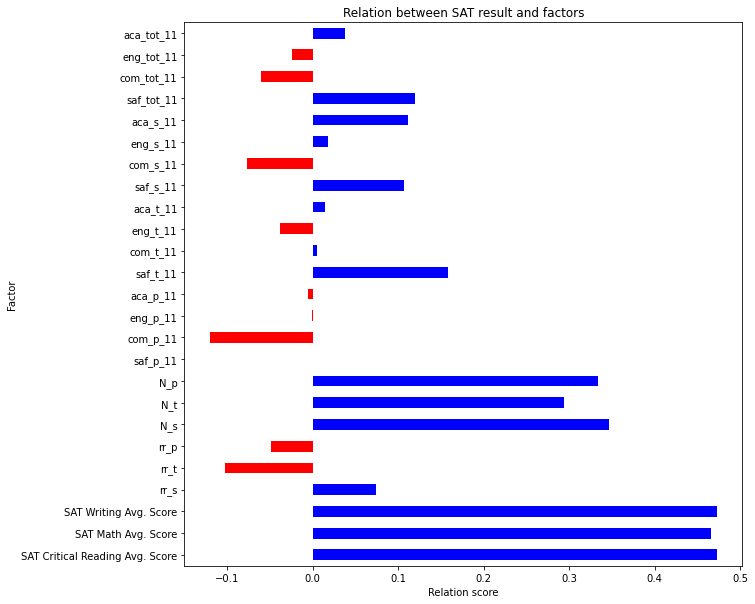

In [42]:
## Create group of correlation graph:
col = ['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score',"rr_s", "rr_t", "rr_p", 
             "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", 
             "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", 
             "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", 
             "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

## Create relation graph:
df = correlation[col]

## Create color function:
cor_negative = df<0
cor_nev_map = cor_negative.map({True:'red',
                                   False:'blue'})

ax = df.plot.barh(y='Correlations', figsize=(10, 10), color=cor_nev_map)
plt.xlabel('Relation score')
plt.ylabel('Factor')
plt.title('Relation between SAT result and factors')
plt.show()

For the correlation's result:
- None of this over 0.5 (`SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`) => The relation is exist, but not too strong, and this is the mismatch point due to the SAT result isn't relative too strong with its test distribution result => The high probability that we won't get any stronger conclusion from this data.
- For the information like: race, region... :
1. In the result we can see the relation of SAT result with number of two distinct genre whose join this test isn't strong enough to conclusion but the relation for women's side is slightly higher than man. (`man_num`, `women_num`...)
2. The data isn't enough but in field of race: Asian seems a bit highest, while for _`Black/White people`_, While people seems highest for the relation with higher SAT result.
-  For other factor:
1. The `total_enrollment` seem have shapely relation with SAT result => The school with large student seem do better than which school have less enroll than the one above
2. The relation between SAT result with the number of student who use English and France in school a bit strange (`ell_percent`, `frl_percent`) due to its negative correlation => It's like SAT results don't relation well with those school which for naive French/ Spanish speaker, English speaker. 
3. From the relation graph we can see `saf_t_11` and `saf_s_11` is weak relativing with SAT score (less than 0.25).

Since the enroll seem have relation with SAT result => Let's make a plot to see the relation of these field.

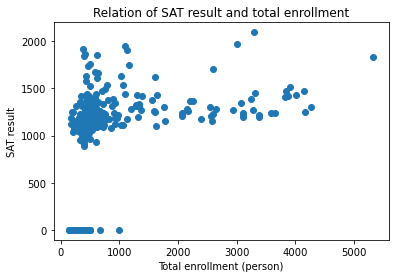

In [43]:
# Relation graph of SAT result and enroll:
plt.scatter(combine.total_enrollment, combine.sat_scores)
plt.xlabel('Total enrollment (person)')
plt.ylabel('SAT result')
plt.title('Relation of SAT result and total enrollment')


plt.show()

We're looking at the relation graph, and we can see a countracy thing: Though the enroll is high but the SAT result not seem higher than the area with less enroll => __We can reject the supposing that the higher enrollment, the better SAT result be__.

We also observe that there is a cluster area with total enrollment is less than 1000, along with SAT result less than 1000 scores too => We will filter the school name which appear in the cluster and see what's the school here.

In [44]:
## Get the name of school with total enrollment and SAT result both less than 1000

bool_1 = combine.total_enrollment <1000 # enroll amount less than 1000
bool_2 = combine.sat_scores <1000 # sat score less than 1000 points
total = bool_1&bool_2

low_enroll = combine[total]
low_enroll.loc[:,['SCHOOL NAME','ell_percent']]

,SCHOOL NAME,ell_percent
18,MANHATTAN BUSINESS ACADEMY,9.9
19,BUSINESS OF SPORTS SCHOOL,7.6
20,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,28.3
31,MANHATTAN ACADEMY FOR ARTS & LANGUAGE,86.9
32,HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES,8.8
33,INTERNATIONAL HIGH SCHOOL AT UNION SQUARE,94.9
56,THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS,25.1
57,THE GLOBAL LEARNING COLLABORATIVE,19.3
59,FRANK MCCOURT HIGH SCHOOL,0.9
74,"COLUMBIA SECONDARY SCHOOL FOR MATH, SCIENCE, A...",0.6


- The shared points of these school is they are not focus on __professional academic__: Some of them are for those who over-age to join garde 9th~, some of them are designed for art field, and some of them are preparing for those who aiming to serve in specific of Science/ Engineer College (`COLUMBIA SECONDARY SCHOOL FOR MATH, SCIENCE..` case)
- The other points its the higher percentage of English language learner, and it's match with the negative relation of SAT result with `ell_per` => We will generate a relation graph of `ell_per` and `sat_scores` to see closer

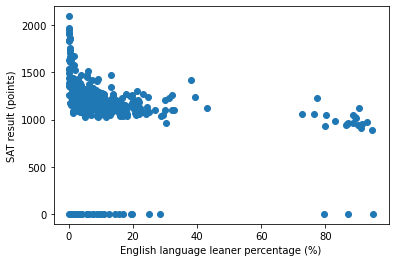

In [45]:
## Relation graph of English lang leaner with SAT result:
plt.scatter(combine['ell_percent'], combine['sat_scores'])
plt.xlabel('English language leaner percentage (%)')
plt.ylabel('SAT result (points)')

plt.show()

One way to make very granular statistics easier to read is to aggregate them. In this case, we aggregate by district, which enables us to understand how `ell_percent` varies district-by-district instead of the unintelligibly granular school-by-school variation.

In [46]:
## Aggregate data by distinct:
districts = combine.groupby('school_dis').agg(np.mean)

## Display the data:
districts.reset_index(inplace=True)
districts.loc[:,['school_dis','ell_percent']].head(n=5)

,school_dis,ell_percent
0,01,10.000000
1,02,13.006250
2,03,9.025000
3,04,4.557143
4,05,4.157143


As mentioned above, the safety report of teacher and student have weak relation with SAT test result. But we could plot a relation graph for it to check how the weak relationship is, by the graph below:

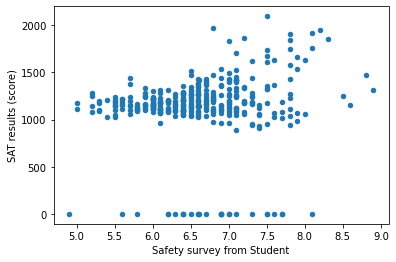

In [47]:
## Relation graph of saf_s_11 field and SAT result:

combine.plot.scatter(x='saf_s_11', y='sat_scores')
plt.xlabel('Safety survey from Student')
plt.ylabel('SAT results (score)')

plt.show()

Except for some points area from 7.0 and above relation with the higher SAT result, all the remains almost stick at range 1000~1500 points. Now let's move to the variety by borough of safety report.

In [48]:
## Aggregate safety scores by borough
combine.loc[:,'borough'] = combine.DBN.str[2] ## define the borough : X-borough-district_number

boroughs = combine.groupby('borough').agg(np.mean) ## we evaluate eveything by the mean value
boroughs.reset_index(inplace = True)
boroughs[['borough','saf_s_11']]

,borough,saf_s_11
0,K,6.370755
1,M,6.831370
2,Q,6.721875
3,R,6.530000
4,X,6.606577


With the description about each borough : [K, M, Q, R, X](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City), we can observed that follow the result we got, the __Manhattan and Queens borough__ is the place where the most student accept that the safety condition is factor for better SAT result. So, let's see if their place has the SAT result higher or not (though we know these field have not relation with each other) 

In [49]:
boroughs[['borough','sat_scores']].sort_values(by='sat_scores', ascending=False)

,borough,sat_scores
3,R,1382.500000
2,Q,1191.171875
1,M,1128.800000
0,K,1112.113208
4,X,1078.666667


As expect, the _Richmond_ country (borough __Staten Island__) got the highest SAT result, but because we take the mean of SAT result for these borough, there's a chance that some case is standout, but we can expect about Staten Island will appear in the list of school with high SAT score.

## Sub-mission 2: Evaluate the SAT result by demographics data:

In the sub-mission 1, we've mentioned to a bit of demographics data: which borough?... Now we will deep digger into the demographics data, like: race/ region (`white_per`, `asian_per`, `black_per`, `hispanic_per`), genre (`man_per`, `woman_per`).. and answer the question: _Have the standardlize test had efficacy/ unfair with certain group?_

To get a quick look, we will plot a relation graph about 4 factor above with SAT result, and take account into something deeper from that graph.

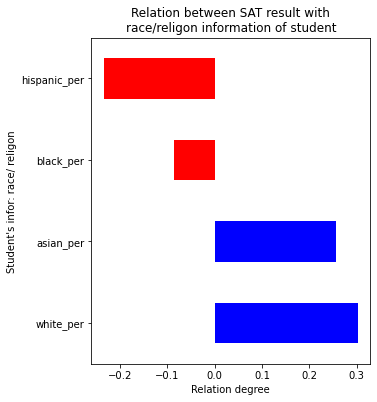

In [50]:
## Relation graph above race/ relagion to SAT result:

# Define columns:
reg = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

# Define color filter:
corr_reg_pos = correlation[reg]>0
corr_pos_map = corr_reg_pos.map({True:'blue', False:'red'})

# Plot:
correlation[reg].plot.barh(figsize=(5,6), color = corr_pos_map)
plt.xlabel('Relation degree')
plt.ylabel("Student's infor: race/ religon")
plt.title('Relation between SAT result with\nrace/religon information of student')
plt.show()

We got some observe:
- In group of black/ white student: Ratio of white student got higher SAT score is higher than Black Student (the reason is unknow since the deeper demographics info is not known)
- In group of Asian/ Hispanic student: Though is not certainly but __Asian student__ tend to __got SAT result higher__, and this observe is no doubt because there's so many title about Asian student got high SAT score in everywhere at e-news.

Now we want to find school where the student learned, and find for three cases:
- For hispanic student: School with low SAT result and high SAT result (judging range: SAT score = 1200 points)
- For school with hispanic student greater than 95% (`hispanic_per` greater than 95%)
- For school with a `hispanic_per` less than 10% and __an average SAT score__ greater than 1800.

Before, let's graph a relation plot between hispanic percentage student with SAT result:

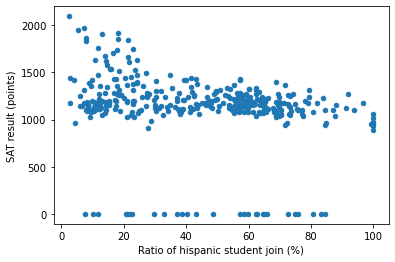

In [51]:
## Relation between hispanic_per with sat_scores:
combine.plot.scatter(x='hispanic_per', y='sat_scores')
plt.xlabel('Ratio of hispanic student join (%)')
plt.ylabel('SAT result (points)')
plt.show()

So we've clearly know what dose our case mention, let's digger in.

In [52]:
## Find school with hispanic student in (find by hispanic_per)
hispanic_stdn = combine[['sat_scores','hispanic_per','SCHOOL NAME']]

## case 1: 
#1. Low SAT result:
low_SAT = hispanic_stdn[hispanic_stdn.sat_scores<1200]
#2. High SAT result:
high_SAT = hispanic_stdn[hispanic_stdn.sat_scores>1200]

## case 2: find school with ratio of hispanic student greater than 95%:
hispnaic_95 = hispanic_stdn[hispanic_stdn.hispanic_per>95]

## case 3: find the school with less hispanic student and average SAT score greater than 1800:
case3 = hispanic_stdn[hispanic_stdn.hispanic_per<10]
# Groupby school:
school = case3.groupby('SCHOOL NAME').agg(np.mean)
school = school.reset_index()

In [53]:
# Find the information of school with hispanic student is the most:
hispnaic_95['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

After the research about school information, all these school is for French language leaner (they've been taught for speak English, but most of time, they speak French). And for that purpose, the SAT result can be a bit lower because they must learn English first and they took time to used to it. Let's move to the school which less hispanic student in.

In [54]:
## Find the school with hispanic student in and average SAT scores is above 1800:
school[['SCHOOL NAME','sat_scores']][school['sat_scores']>1800]

,SCHOOL NAME,sat_scores
5,BRONX HIGH SCHOOL OF SCIENCE,1969.0
8,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0
20,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868.0
25,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953.0
26,STUYVESANT HIGH SCHOOL,2096.0


We've mentioned this by find the relation between `borough` and `sat_scores` result, and got the conclusion that the borough with SAT result highest is Staten Island. So we have one of this here: `STATEN ISLAND TECHNICAL HIGH SCHOOL`, and the school with highest SAT result is `STUYVESANT HIGH SCHOOL` which location is in Manhanttan, by the principal is from Asian people whose got basic study thinking of Asian. And the shared point is __the ratio of hispanic student here is small__.

Now, take a look on `gender` information, and as usual, we take a look about its relation graph for get a overview about among man/woman, which gender tend to have SAT score higher?

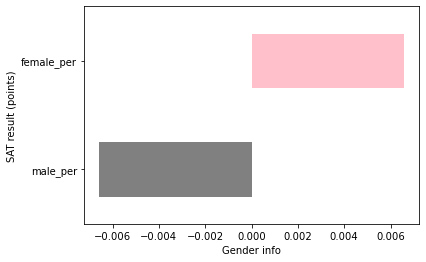

In [55]:
## Relation of gender to SAT result:
#Define the columns:
gender = ['male_per', 'female_per']
#Color filter:
corr_gen = correlation[gender]>0
corr_gen_map = corr_gen.map({True:'pink',False:'Grey'})

#Plot:
correlation[gender].plot.barh(x='gender',y='sat_scores',color=corr_gen_map)
plt.xlabel('Gender info')
plt.ylabel('SAT result (points)')
plt.show()

We can see a _very weak relation_ between gender info and SAT results (less than 0.1), but if take a look closer, we can say that group of female student do slightly better than male student. Let's releave it by find some school name with special case below:
- Schools with high SAT scores and a high `female_per`
- Schools with a `female_per` __greater than 60%__ and an __average SAT score greater than 1700__

Before this, let's make a graph about girls and SAT result

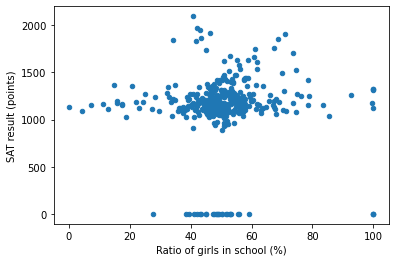

In [56]:
## Relation graph of female student and SAT result:
combine.plot.scatter(x='female_per', y='sat_scores')
plt.xlabel('Ratio of girls in school (%)')
plt.ylabel('SAT result (points)')

plt.show()

In [57]:
# Find school name with special case:
girls = combine[['SCHOOL NAME', 'female_per', 'sat_scores']] ## Extract female student into another df

# case 1: high female_per (>50%) and high SAT score (>1200 points)
bool_a = girls['female_per']>50
bool_b = girls['sat_scores']>1200
mask = bool_a&bool_b

case1 = girls[mask]['SCHOOL NAME']

# case 2: female_per > 60%, average SAT score >1700:
con1 = girls[girls['female_per'] >60]
case2 = con1.groupby('SCHOOL NAME').agg(np.mean)
school_name = case2.reset_index()

In [58]:
# School name case 1:
case1

3                                MARTA VALLE HIGH SCHOOL
4      NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...
5                         BARD HIGH SCHOOL EARLY COLLEGE
10                                      PACE HIGH SCHOOL
17                                           NYC ISCHOOL
                             ...                        
346            BACCALAUREATE SCHOOL FOR GLOBAL EDUCATION
347            CSI HIGH SCHOOL FOR INTERNATIONAL STUDIES
349                       THE MICHAEL J. PETRIDES SCHOOL
352                                   CURTIS HIGH SCHOOL
353                              TOTTENVILLE HIGH SCHOOL
Name: SCHOOL NAME, Length: 85, dtype: object

Due to the less insight by case 1, we'll next to the case 2:

In [59]:
## School name case 2:
school_name[['SCHOOL NAME','sat_scores']][school_name['sat_scores']>1700]

,SCHOOL NAME,sat_scores
0,BARD HIGH SCHOOL EARLY COLLEGE,1856.0
2,BEACON HIGH SCHOOL,1744.0
14,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0
15,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0
41,TOWNSEND HARRIS HIGH SCHOOL,1910.0


We have some observe for the result:
- Almost the schools above is in __Manhattan and Queen__
- Not only these school have the higher percentage of female students, they are well-known by their check on first enrolling of student (meet some high requirement of skill...)
- The student distribution is always __larger__ of __White student__, followed by Black /Hispanic /Asian student ratio change along each school.

__Plus__: On the correlation table we can see that the amount of student who taken AP test and total AP test is have correlation with SAT results too (though it's not much strong ~ 0.25). Now we will releave the relation of these field with SAT result to see is there have any interesting insights. Because `total_enrollment` is highly correlated with `sat_score`, we don't want to lead to bias results. Instead, we'll look at __the percentage of students in each school__ who took at least one AP exam.

Correlation of percentage student taken AP test with SAT results is -0.3535612724363696


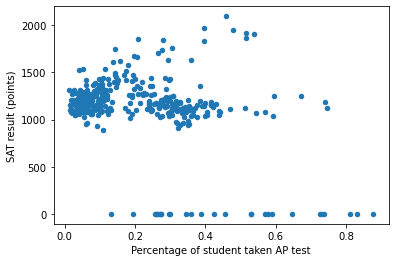

In [60]:
# Create a column with percentage of student who take at least 1 AP test:
combine.loc[:,'ap_percent'] = combine['AP Test Takers']/combine['total_enrollment']

# Comput the correlation of this field to SAT result:
corr_2 = combine.corr()['ap_percent']['sat_scores']
print('Correlation of percentage student taken AP test with SAT results is {}'.format(corr_2))
# Plot the relation graph of AP test takers percent to SAT result:
combine.plot.scatter(x='ap_percent', y='sat_scores')
plt.xlabel('Percentage of student taken AP test')
plt.ylabel('SAT result (points)')
plt.show()

Follow the correlation result we can consider that SAT result is negative effect with the percentage of student who take AP exam; and we can see a similar thing out here: from __percentage of 20% below__, the __SAT result seem OK__ for the points can up to ~1500. But from __the half of 20% to the last__, the SAT result __doesn't__ seem to be __better__ (except some outlier) => We can suggest that the more student focucs on get better by take many AP test, the worse their result get because they take time to better at AP but not much time to focus on SAT.

# Sub-mission 3: Find the relation of Class size with SAT result:

There are 5 field of Class size we have: `NUMBER OF STUDENTS / SEATS FILLED`, `NUMBER OF SECTIONS`, `AVERAGE CLASS SIZE`, `SIZE OF SMALLEST CLASS`, `SIZE OF LARGEST CLASS`. Now let's draw the relation graph of these field with SAT result to see the overview first, and then we will dig in a spectacular field to get the meaning.

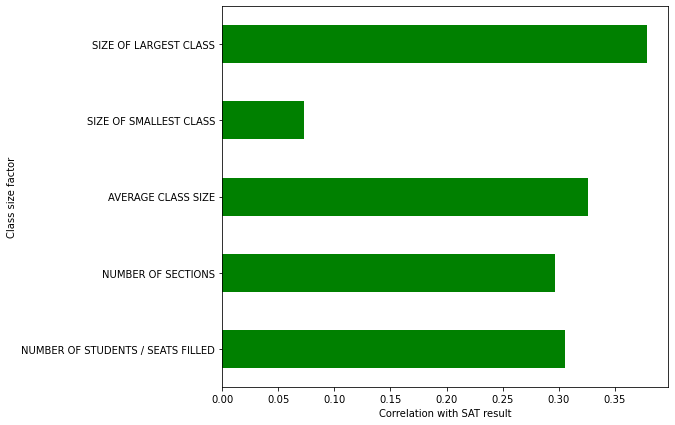

In [61]:
# Define the column:
col_class = ['NUMBER OF STUDENTS / SEATS FILLED','NUMBER OF SECTIONS','AVERAGE CLASS SIZE',
             'SIZE OF SMALLEST CLASS','SIZE OF LARGEST CLASS']

# Define the color filter:
class_corr = correlation[col_class]>0
class_corr_pos = class_corr.map({True:'green', False:'red'})

# Plot:
correlation[col_class].plot.barh(color = class_corr_pos, figsize=(8,7))
plt.xlabel('Correlation with SAT result')
plt.ylabel('Class size factor')
plt.show()

We can see in the graph: the `SIZE OF LARGEST CLASS` have good relation with SAT result, give us a suggest that a school with large scale will have SAT result better than those which in smallest class. Now let's digger into this, create another relation graph between `SIZE OF LARGEST CLASS` and `sat_scores` to see the detail relation.

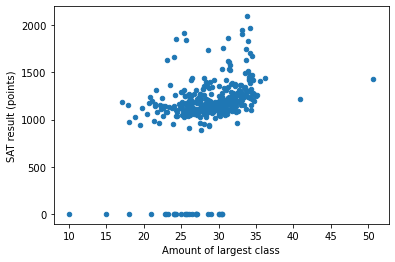

In [62]:
# Scatter plot of SIZE OF LARGEST CLASS vs SAT result:
combine.plot.scatter(x='SIZE OF LARGEST CLASS', y='sat_scores')
plt.xlabel('Amount of largest class')
plt.ylabel('SAT result (points)')
plt.show()

We can see the amount in one class get 30-35 students seems have better SAT result, now let's pick up the school name with class size is __30~35 student__, and get _SAT average_ __above 1700__.

In [63]:
# Pick up school name with class size >30 and average SAT result is above 1700:
# Create a df that use for both this case and Average Size case
class_sizeM = combine[['SCHOOL NAME', 'SIZE OF LARGEST CLASS','AVERAGE CLASS SIZE', 'sat_scores']]

# Filter:
#task1 : for <30 class size <35
task1 = class_sizeM[class_sizeM['SIZE OF LARGEST CLASS'].between(30,35)]
school = task1.groupby('SCHOOL NAME').agg(np.mean)
school.reset_index(inplace=True)

# Display some school name:
school[['SCHOOL NAME', 'SIZE OF LARGEST CLASS', 'sat_scores']][school['sat_scores']>1700]

,SCHOOL NAME,SIZE OF LARGEST CLASS,sat_scores
15,BEACON HIGH SCHOOL,33.666667,1744.0
22,BRONX HIGH SCHOOL OF SCIENCE,34.210526,1969.0
32,BROOKLYN TECHNICAL HIGH SCHOOL,33.947368,1833.0
44,ELEANOR ROOSEVELT HIGH SCHOOL,30.666667,1758.0
45,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,34.250000,1707.0
110,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,31.266667,1868.0
128,STATEN ISLAND TECHNICAL HIGH SCHOOL,33.176471,1953.0
129,STUYVESANT HIGH SCHOOL,33.842105,2096.0
140,TOWNSEND HARRIS HIGH SCHOOL,33.125000,1910.0


As expect, we can see a lot of familiar school name here, with their maximum class size is in range of __30 - 35 student/ class__. The class size is large enough to manage student, but don't quite small to not get enough fee to development the teaching / learning condition.

Now, we get an extra question: how many student in average in one class is efficacy for make them got effective learning enviroment, from there they can get SAT score better? => We will answer this question with `AVERAGE CLASS SIZE` field, now let's see the relationship between `AVERAGE CLASS SIZE` and `sat_scores` result.

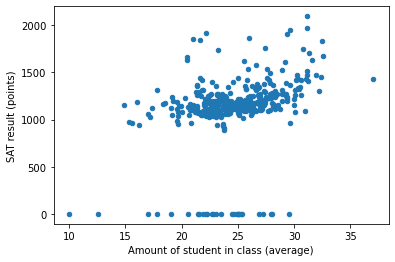

In [64]:
# Scatter plot of AVERAGE CLASS vs SAT result:
combine.plot.scatter(x='AVERAGE CLASS SIZE', y='sat_scores')
plt.xlabel('Amount of student in class (average)')
plt.ylabel('SAT result (points)')
plt.show()

We can perform immediately find the school name with size in class from __25 to 30__, and get their __SAT averge above 1700__, to confirm one thing: The optimize number for almost school is __25-30__, and the __maximum size__ in one class can up to __35__, but don't get over it, unless we can see the distribution with class size greater than 35 is not good at all (and everyone know it, that's the obvious thing)

In [65]:
# Filter:
#task2 : for <25 class size <30
task2 = class_sizeM[class_sizeM['AVERAGE CLASS SIZE'].between(25,30)]
school_2 = task2.groupby('SCHOOL NAME').agg(np.mean)
school_2.reset_index(inplace=True)

# Display some school name:
school_2[['SCHOOL NAME', 'AVERAGE CLASS SIZE', 'sat_scores']][school_2['sat_scores']>1700]

,SCHOOL NAME,AVERAGE CLASS SIZE,sat_scores
43,ELEANOR ROOSEVELT HIGH SCHOOL,27.433333,1758.0
105,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,26.006667,1868.0
121,STATEN ISLAND TECHNICAL HIGH SCHOOL,29.588235,1953.0
132,TOWNSEND HARRIS HIGH SCHOOL,29.362500,1910.0


Once again, we must say that there are all familiar school name which is mentioned above in: _Which school with female percentage greater still get SAT result better?_ or _Which school have less hispanic student and get SAT result better?_ If you want to know why: that's one reason of it. Not only for the optimize number of student in class, they all have optimize learning method, and the last: Some of them have checking in first join.

__CONCLUSION:__ The SAT result have good relation with class size, especially with which class size is __25 - 35 student/ class__

# Sub-mission 4: Which borough have a good high school?

To evaluate a school is good school, we might want define _'good'_ word here meaning of a school __which graduated students can get their good SAT result__. We can reference the summarized data follow by borough, the detail is sort the borough follow their rank of __average SAT scores__, and plot a barplot to see the detail.

  borough   sat_scores
3       R  1382.500000
2       Q  1191.171875
1       M  1128.800000
0       K  1112.113208
4       X  1078.666667


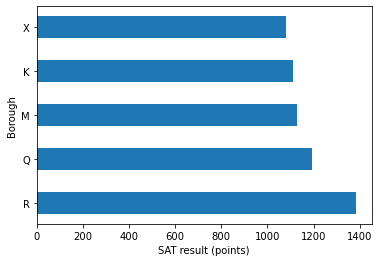

In [66]:
## Call back the result:
task3 = boroughs[['borough','sat_scores']].sort_values(by='sat_scores', ascending=False)
print(task3)
## Generate bar plot:
plt.barh(task3['borough'], task3['sat_scores'], height=0.5)
plt.xlabel('SAT result (points)')
plt.ylabel('Borough')
plt.show()

Before take the further step, we will want to get clearly __what the high SAT scores is?__ So let's take a histogram with a line of which the result of SAT test is appear the most, along there we can see what mark we can take to evaluate one got high SAT score.

In [67]:
combine['sat_scores'].describe()

count     363.000000
mean     1129.068871
std       372.301233
min         0.000000
25%      1094.500000
50%      1169.000000
75%      1266.500000
max      2096.000000
Name: sat_scores, dtype: float64

IQR=172.0


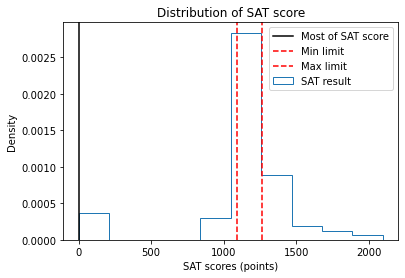

In [68]:
# Define some measurement unit:
q1, q3 = np.quantile(combine['sat_scores'],[.25, .75])
sat_mode = combine['sat_scores'].mode()[0]
print('IQR={}'.format(q3-q1))

# Plot histogram of SAT score:
plt.hist(combine['sat_scores'], density=True, label='SAT result', histtype='step')
# combine['sat_scores'].plot.kde()

plt.axvline(sat_mode, color='black', label='Most of SAT score')
plt.axvline(q1, color='red', label='Min limit', ls='dashed')
plt.axvline(q3, color='red', label='Max limit', ls='dashed')

plt.xlabel('SAT scores (points)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of SAT score')
plt.show()

From the distribution of SAT score and the graph above, we need to clean the data of SAT score, laying in the fact that the most of SAT score from this data is zero (0), and this is unacceptable for the real-world SAT result. To do this, we can drop all the record with SAT score = 0 (this can be happend when fill in missing value).

In [69]:
# Drop the records with SAT score = 0
combine = combine[combine['sat_scores']>0]

# Check the distribution again:
combine['sat_scores'].describe()

count     335.000000
mean     1223.438806
std       185.543904
min       887.000000
25%      1108.500000
50%      1181.000000
75%      1272.500000
max      2096.000000
Name: sat_scores, dtype: float64

IQR=164.0
Most of SAT scores = 1111.0
Kurtosis of distribution = 4.524230243231742
Skewness of distribution = 1.8604943462810832


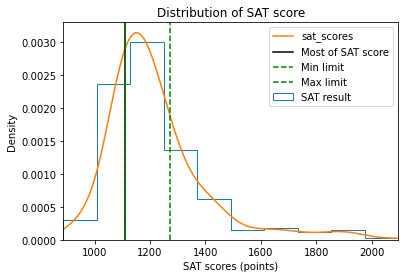

In [70]:
# Plot the graph again:
# Define some measurement unit:
q1, q3 = np.quantile(combine['sat_scores'],[.25, .75])
sat_mode = combine['sat_scores'].mode()[0]

print('IQR={}'.format(q3-q1))
print('Most of SAT scores = {}'.format(sat_mode))

kurtosis = combine['sat_scores'].kurt()
skewness = combine['sat_scores'].skew()

print('Kurtosis of distribution = {}'.format(kurtosis))
print('Skewness of distribution = {}'.format(skewness))

# Plot histogram of SAT score:
plt.hist(combine['sat_scores'], density=True, label='SAT result', histtype='step')
combine['sat_scores'].plot.kde()

plt.axvline(sat_mode, color='black', label='Most of SAT score')
plt.axvline(q1, color='green', label='Min limit', ls='dashed')
plt.axvline(q3, color='green', label='Max limit', ls='dashed')

plt.xlabel('SAT scores (points)')
plt.ylabel('Density')

plt.xlim(combine['sat_scores'].min(), combine['sat_scores'].max())
plt.legend()
plt.title('Distribution of SAT score')
plt.show()

From the statistic metric we can see that:
- The distribution is __NOT normal distribution__ with postivie skewness (_Right skew distribution_) and _positive kurtosis  __k>3.0__ => The kurtosis of distribution is _lepto-kurtosis_ (more kurtic than normal distribution). From this observed:
1. The maximum points of SAT is 2400 (3 sections * 800 points MAX in 1 section), a half is 1200 points; from the graph, there is no student get too bad points (lower than 500) => students skill average is good.
2. From the IQR with upper limit (Q1) and lower limit (Q3), _the most point_ student get is __approximately equal to Q1__ => _most of student get the standard score of SAT (1200 points)_, and it can be the good news with SAT test organization when they are good in create a exam to check the student.
- For the marked of __high SAT score__:
1. Due to _75% SAT scores is laying on 1272 points_ => __From 1300 points we can consider that it is high SAT score__, but we must reference to the College's KPI in every year to see what's kind of score will likely to be pass the College.

For the covenient, we will add the line of where the most of points less than or equal to the maximum we can reach. We will get the mark of score that __beat over 85% the rest__, to get [the most chance of College pass-assist](https://www.cappex.com/articles/testing/what-is-a-good-SAT-score), and make the huge different with the rest. 

The SAT point that beat over 85% the rest = 1363.6
Most of SAT scores = 1111.0


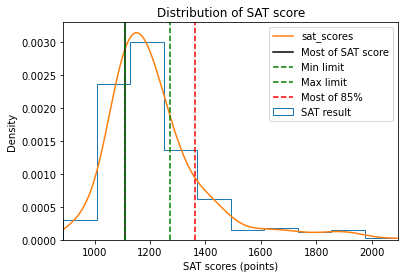

In [71]:
# Define some measurement unit:
q1, q3 = np.quantile(combine['sat_scores'],[.25, .75])
percen_85 = np.percentile(combine['sat_scores'],85)
sat_mode = combine['sat_scores'].mode()[0]

print('The SAT point that beat over 85% the rest = {}'.format(percen_85))
print('Most of SAT scores = {}'.format(sat_mode))

# Plot histogram of SAT score:
plt.hist(combine['sat_scores'], density=True, label='SAT result', histtype='step')
combine['sat_scores'].plot.kde()

plt.axvline(sat_mode, color='black', label='Most of SAT score')
plt.axvline(q1, color='green', label='Min limit', ls='dashed')
plt.axvline(q3, color='green', label='Max limit', ls='dashed')
plt.axvline(percen_85, color='red', label='Most of 85%', ls='dashed')

plt.xlabel('SAT scores (points)')
plt.ylabel('Density')

plt.xlim(combine['sat_scores'].min(), combine['sat_scores'].max())
plt.legend()
plt.title('Distribution of SAT score')
plt.show()

We've done, from the graph we can see that a mark will _beat over 85% the rest_ is when SAT scores reach __1364 points__. We will take this result to filter all the school for each borough, and see the ratio of school can be reach to this degree.

In [72]:
# Filter the school from each borough:
schl_borg = combine.groupby('borough')

# Get the school for each borough:
data_group = {}
key = combine['borough'].unique()
for item in key:
    data_group[item] = schl_borg.get_group(item) #To get the group of co-responed borough
    
#Check:
for k, v in data_group.items():
    print(k)

M
X
K
Q
R


In [73]:
# Count the original school in each borough:
count_ori = []
for item in key:
    count = data_group[item]['SCHOOL NAME'].count()
    count_ori.append(count)
    
# Check:
count_ori

[79, 87, 100, 59, 10]

In [74]:
# Filter the school from each borough with SAT score >1364 points
schl_borg_2 = combine.groupby('borough').apply(lambda x: x[x['sat_scores']>1364])

# Get the school for each borough:
data_group_2 = {}
key = combine['borough'].unique()
for item in key:
    data_group_2[item] = schl_borg_2[schl_borg_2['borough']==item] #To get the group of co-responed borough
    
#Check:
for k, v in data_group_2.items():
    print(k)

M
X
K
Q
R


In [75]:
# Count the original school in each borough:
count_after = []
for item in key:
    count = data_group_2[item]['SCHOOL NAME'].count()
    count_after.append(count)
    
# Check:
print(count_after)

# Get the ratio of school which above 1364 SAT points:
result = []
for i, j in zip(count_after, count_ori):
    ratio = (i/j)*100
    result.append(ratio)
result

[21, 3, 7, 15, 4]


[26.582278481012654,
 3.4482758620689653,
 7.000000000000001,
 25.423728813559322,
 40.0]

We've got both of how many school in borough/ how many school in borough match with SAT scores condition => Now we will plot 2 graph: 1 is describe _the percentage of borough have school meet the SAT scores condition_, the remain is describe both of number of schools _before/ after filter with SAT scores condition_.

In [76]:
# Set dataframe for the result:
df3 = pd.DataFrame(index=key, data={'Original':count_ori,
                              'With high SAT score':count_after,
                                   'borough_fullname':['Manhattan','The Bronx','Brooklyn','Queens','State Island']})


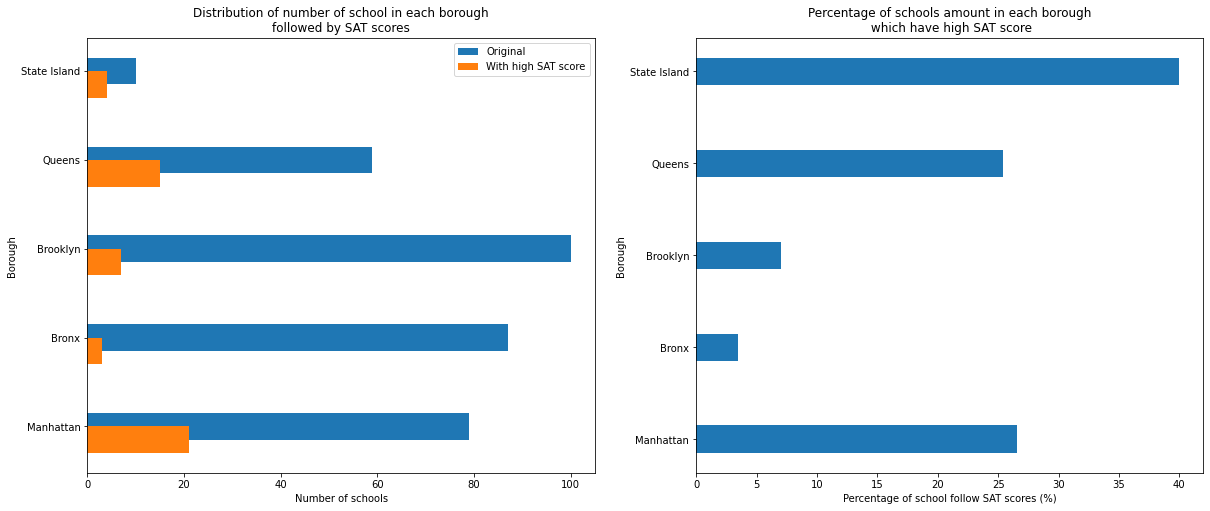

In [77]:
# Combine plot:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)

#Statistic plot: which school is 'good'?
plt.barh(key, result, height = 0.3)
plt.xlabel('Percentage of school follow SAT scores (%)')
plt.ylabel('Borough')
plt.yticks(ticks=[4,3,2,1,0],labels=['State Island','Queens','Brooklyn','Bronx','Manhattan'])

plt.title('Percentage of schools amount in each borough\n which have high SAT score')

plt.subplot(1,2,1)
#Plot graph to see the different of each borough:
plt.barh(y=df3['borough_fullname'], width=df3['Original'],height=0.3, label='Original')
plt.barh(y=df3['borough_fullname'], width=df3['With high SAT score'],align='edge',height=-0.3, label='With high SAT score')
plt.xlabel('Number of schools')
plt.ylabel('Borough')
plt.yticks(ticks=[4,3,2,1,0],labels=['State Island','Queens','Brooklyn','Bronx','Manhattan'])

plt.legend()
plt.title('Distribution of number of school in each borough\nfollowed by SAT scores')
plt.show()

__CONCLUSION:__ We can see a lot of things here:
- For State Island, due to the __sample size is small__ (<20 school), and the school with highSAT score is __approximately 50%__ => _we can't say State Island is borough with good high school_ (need hypothesis testing?)
- By combine the result of distribution grpah by percentage and distribution grpah by number of schools, we can observe that Manhattan and Queen is two borough with good high school in, follow by these condition:
1. __Sample size is much enough (>60 school)__
2. The overview percentage (> 25%)
3. The relational between Manhattan/ Queens result with other borough (the best among 5 borough)

__OVERALL CONCLUSION__:
1. Have SAT result had any efficacy? Yes, but it's not as clear as sapphire
- For __race/ religon__ : Which school have number of __naive French language speaker larger__, or tend to type of __not a professional academic__ have chance of SAT result lower
- For __genre__: Not enough information (due to a very weak correlation)
- For some factor of school: __Safety scores__ by student report? __YES__, especially combine to the result of which borough have good high school (Sub-mission 4)
- In addtion, a class size which have __25 - 35 student/class__ tend to get higher SAT result (by its good positive correlation) => In range of 35 student/class: it's not matter of less or much class size, it's about what method to teaching of schools.
2. Which borough tend to have good high school? (By get higher SAT score?):
- What points of SAT scores is considering to be high? Above __1364 points (over 85% of the rest)__
- Which borough match this condition? __Manhattan__ and __Queens__
- Why State Island get good percentage of high SAT result but not list it to the result above? Because of its __too small sample size (<20 sample)__, and __the school which above 1364 points approximately 50%__ => is it bias result if we list State Island into our result??